<a href="https://colab.research.google.com/github/Logeshn009/Computer-Vision-Lab-Programs/blob/main/2147120_CV_Lab_Programs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 1

In [ ]:
!pip install opencv-python # OpenCV (Open Source Computer Vision Library) is an open source computer vision and machine learning software library
!pip install numpy
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Python code to read image
import cv2 #cv2 is the module import name for opencv-python
from google.colab.patches import cv2_imshow  # The function cv2 imshow() is used to add an image in the window. The window itself adjusts to the size of the image. 
from google.colab import files
from PIL import Image
import matplotlib.pyplot as plt

# reading the file

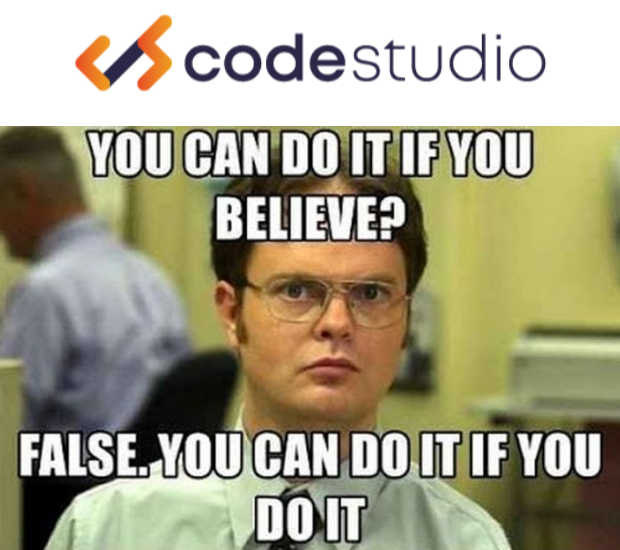

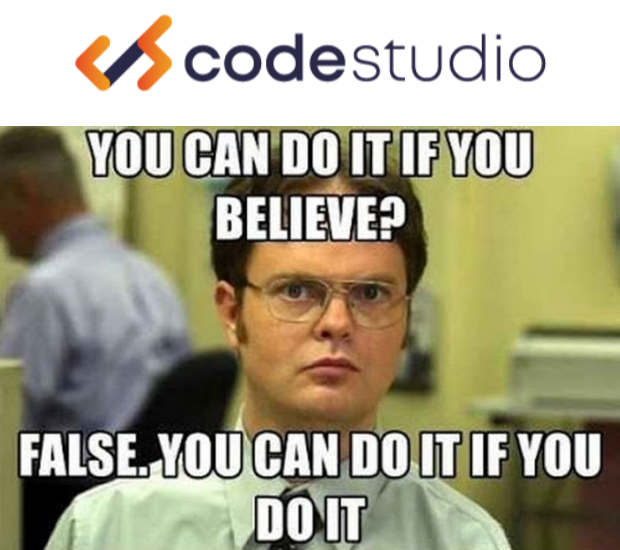

In [ ]:
# To read image from disk, we use
# cv2.imread function, in below method

img1 = cv2.imread("/content/motiv.png", cv2.IMREAD_COLOR)
img2 = cv2.imread('/content/motiv.png', cv2.IMREAD_UNCHANGED)
cv2_imshow(img1) 
cv2_imshow(img2)

imread_color >>> If set, always convert image to the 3 channel BGR color image.

imread_unchanged >>> If set, return the loaded image as is (with alpha channel, otherwise it gets cropped). Ignore EXIF orientation.

In [ ]:
# imwrite operation the function imwrite saves the image to the specified file

cv2.imwrite('motiv.png',img1)

True

In [ ]:
image = Image.open('/content/motiv.png')
# Prints the name of the file
print("Filename: ", image.filename)
 
# Prints the format of the file
# Eg- PNG, JPG, GIF, etc.
print("Format: ", image.format)
 
# Prints the mode of the file
# Eg- RGB, RFBA, CMYK, etc.
print("Mode: ", image.mode)
 
# Prints the size as a width and height tuple (in pixels)
print("Size: ", image.size)
 
# Prints the width of the image (in pixels)
print("Width: ", image.width)
 
# Prints the height of the image (in pixels)
print("Height: ", image.height)

Filename:  /content/motiv.png
Format:  PNG
Mode:  RGB
Size:  (620, 550)
Width:  620
Height:  550


In [ ]:
# Specifying the RGB mode to the image
image = image.convert('RGB')
 
# Converting an image from jpeg to JPG format
image.save("converted-jpg-image.jpg")
print("jpg image successfully converted!")

image.save("converted-png-image.png")
print("png Image successfully converted!")

image.save("converted-png-image.gif")
print("gif Image successfully converted!")

image.save("converted-png-image.pdf")
print("PDF Image successfully converted!")

image.save("converted-png-image.tiff")
print("tiff Image successfully converted!")

jpg image successfully converted!
png Image successfully converted!
gif Image successfully converted!
PDF Image successfully converted!
tiff Image successfully converted!


# Lab 2 Convolution and correlation to a particular image in spatial domain

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Convolution method >> Filtering of a source image is achieved by convolving the kernel with the image. In simple terms, convolution of an image with a kernel represents a simple mathematical operation, between the kernel and its corresponding elements in the image.

Assume that the center of the kernel is positioned over a specific pixel (p), in an image.
Then multiply the value of each element in the kernel (1 in this case), with the corresponding pixel element (i.e. its pixel intensity) in the source image.
Now, sum the result of those multiplications and compute the average.
Finally, replace the value of pixel (p), with the average value you just computed.

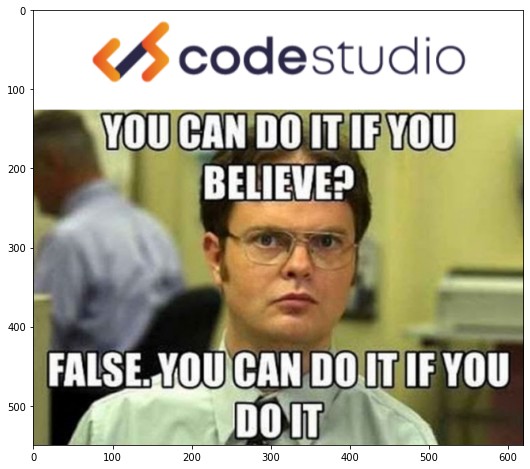

In [ ]:
image = cv2.imread('/content/motiv.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
fig, ax = plt.subplots(1, figsize=(12,8))
plt.imshow(image)

before you apply any convolution to an image, using a 2D-convolution matrix, you need to ensure that all the values are normalized. This is done by dividing each element of the kernel, by the number of elements in the kernel, which in this case is 9

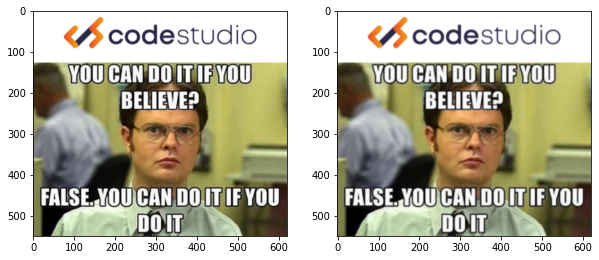

In [ ]:
# box blur

abc=np.ones((3,3))
kernel = np.ones((3, 3), np.float32) / 9  # 32 bit floating point values hdr images use them
img = cv2.filter2D(image, -1, kernel)

# Syntax: filter2D (src, dst, ddepth, kernel)

# Parameters:  
# Src – The source image to apply the filter on.
# Dst – Name of the output image after applying the filter
# Ddepth – Depth of the output image [ -1 will give the output image depth as same as the input image]
# Kernel – The 2d matrix we want the image to convolve with.
fig, ax = plt.subplots(1,2,figsize=(10,6))

ax[0].imshow(image)
ax[1].imshow(img)

In [ ]:
print(abc)
print(kernel)

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


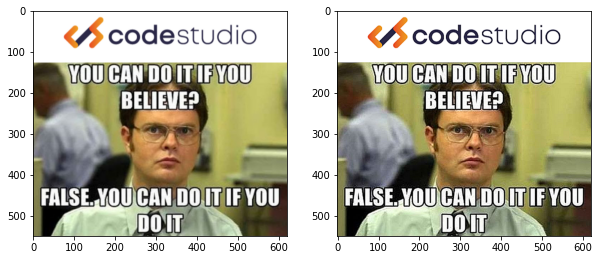

In [ ]:
# sharpening

kernel = np.array([[0, -1, 0],
                   [-1, 5, -1],
                   [0, -1, 0]])
img = cv2.filter2D(image, -1, kernel)
fig, ax = plt.subplots(1,2,figsize=(10,6))
ax[0].imshow(image)
ax[1].imshow(img)

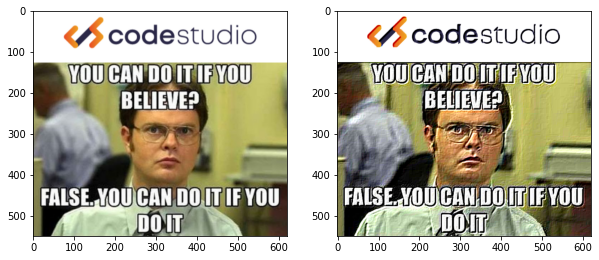

In [ ]:
# emboss

kernel = np.array([[-2, -1, 0],
                   [-1, 1, 1],
                   [0, 1, 2]])
img = cv2.filter2D(image, -1, kernel)
fig, ax = plt.subplots(1,2,figsize=(10,6))
ax[0].imshow(image)
ax[1].imshow(img)

In [ ]:
# Correlation

# read image
src = cv2.imread('/content/motiv.png')
# prepare averaging filter
kernel = np.ones((3, 3), dtype=np.float32)
kernel /= 9
# apply kernel to the original image
dst = cv2.filter2D(src, -1, kernel)
# concatenate images horizontally
result = np.concatenate((src, dst), axis=1)
cv2.imwrite('output.png', result)

True

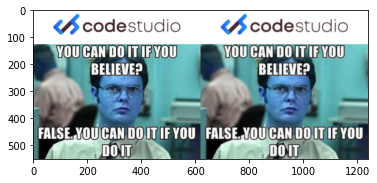

In [ ]:
image = cv2.imread('output.png')
plt.imshow(image)

In [ ]:
# read image
src = cv2.imread('/content/motiv.png')
# prepare the filter using identity kernel
kernel = [[0,0,0], [0,1,0], [0,0,0]]
# apply kernel to the original image
dst = cv2.filter2D(src, -1, np.array(kernel))
# concatenate images horizontally
result = np.concatenate((src, dst), axis=1)
cv2.imwrite('result.png', result)

True

Differentiate the above two methods and interpret your result

Correlation is an exact similarity measure between two functions K (the kernel, filter, or template) and S (the signal under test). It answers the questions, "(1) Where in the signal S are these two functions most similar, and (2) How similar are they at that point?" The similarity measure is computed at point t as the dot product of a copy of the kernel function translated by t with the signal under test.

Convolution is identical to correlation except that the kernel is flipped before correlation. Convolution is only a measure of similarity between two signals if the kernel is symmetric, making the problem equivalent to correlation. Convolution is useful because the flipping of a kernel in its definition makes convolution with a delta function equivalent to the identity function. When using a transform such as the Fourier transform to reconstruct a signal as a linear combination of some set of basis functions, this identity property is indispensable because the spatial continuity of the output signal with respect to the input signal is preserved (the system is causal), whereas correlation would output values in reverse order.

The Basic difference between Correlation and convolution is :-

Correlation is measurement of the similarity between two signals/sequences.

Convolution is measurement of effect of one signal on the other signal.

Write the Different applications of convolution and correlation

*convolution is used to compute the probability density function of a sum of two independent random variables (based on their probability density functions)

*convolution is used to find the common area between the two signals.

*correlation is used to find the comparison of two signals

*correlation is used to appreciate the stationarity of a random signal.

*Correlation is used as well in GPS systems for satellites' detection

# Lab 3 

Histogram Equalization is a computer image processing technique used to improve contrast in images. It accomplishes this by effectively spreading out the most frequent intensity values, i.e. stretching out the intensity range of the image. 

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
path = "/content/lowcontrast.png"
img = cv2.imread(path)

In [ ]:
# Using cv2.imwrite() method
# Saving the image
# Filename
filename = 'lowcontrast.png'
cv2.imwrite(filename, img)
newpath = '/content/lowcontrast.png'
newimg = cv2.imread(newpath)
src = cv2.cvtColor(newimg, cv2.COLOR_BGR2GRAY)
equ = cv2.equalizeHist(src)

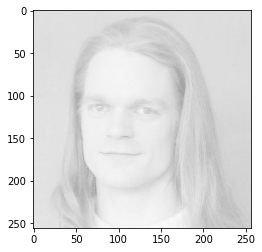

In [ ]:
plt.imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()

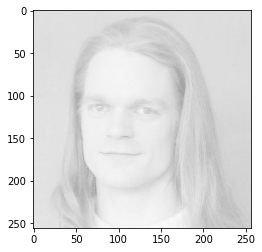

In [ ]:
plt.imshow(newimg)
cv2.waitKey(0)
cv2.destroyAllWindows()

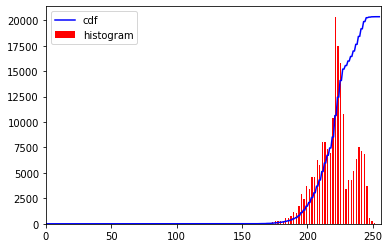

In [ ]:
hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

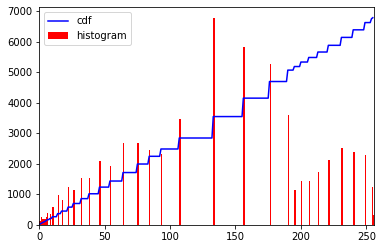

In [ ]:
hist,bins = np.histogram(equ.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(equ.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

# Practice lab

What is affine transformation?

A transformation that can be expressed in the form of a matrix multiplication (linear transformation) followed by a vector addition (translation).
From the above, we can use an Affine Transformation to express:

1. Rotations (linear transformation)
2. Translations (vector addition)
3. Scale operations (linear transformation)

Affine Transformation represents a relation between two images.

The usual way to represent an Affine Transformation is by using a 2×3 matrix.

A=[a00 a10
   a01 a11] 2×2B=[b00b10]2×1
M=[AB]=[a00a10a01a11b00b10]2×3
Considering that we want to transform a 2D vector X=[xy] by using A and B, we can do the same with:

T=A⋅[xy]+B or T=M⋅[x,y,1]T
T=[a00x+a01y+b00a10x+a11y+b10]


We mentioned that an Affine Transformation is basically a relation between two images. The information about this relation can come, roughly, in two ways:
We know both X and T and we also know that they are related. Then our task is to find M
We know M and X. To obtain T we only need to apply T=M⋅X. Our information for M may be explicit (i.e. have the 2-by-3 matrix) or it can come as a geometric relation between points.
Let's explain this in a better way (b). Since M relates 2 images, we can analyze the simplest case in which it relates three points in both images. Look at the figure below:

the points 1, 2 and 3 (forming a triangle in image 1) are mapped into image 2, still forming a triangle, but now they have changed notoriously. If we find the Affine Transformation with these 3 points (you can choose them as you like), then we can apply this found relation to all the pixels in an image.

What does this program do?
Loads an image
Applies an Affine Transform to the image. This transform is obtained from the relation between three points. We use the function cv::warpAffine for that purpose.
Applies a Rotation to the image after being transformed. This rotation is with respect to the image center
Waits until the user exits the program

# Translation

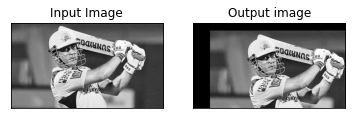

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
# Read image from disk
img1 = cv2.imread('/content/dhoni.jpg',0)
rows, cols = img1.shape[:2]
# Creating translation matrix for shifting the image in the location(100, 50).
# If the shift is (x, y) then matrix would be
# M = [1 0 x]
# [0 1 y]

M = np.float32([[1, 0, 100], [0, 1, 50]])
# warpAffine does appropriate shifting given the
# translation matrix.
res = cv2.warpAffine(img1, M, (cols, rows))

plt.subplot(121),plt.imshow(img1, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(res, cmap = 'gray')
plt.title('Output image'), plt.xticks([]), plt.yticks([])
plt.show()

# Write image back to disk.
#cv2.imwrite(&#39;result.jpg&#39;, res)

# Scaling

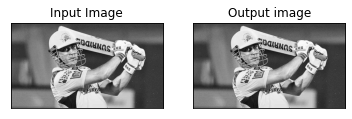

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Read image from disk.
img1 = cv2.imread('/content/dhoni.jpg',0)
rows, cols = img1.shape

# Get number of pixel horizontally and vertically.
(height, width) = img1.shape[:2]

# Specify the size of image along with interpolation methods.
# cv2.INTER_AREA is used for shrinking, whereas cv2.INTER_CUBIC
# is used for zooming.
res = cv2.resize(img1, (int(width / 2), int(height / 2)), interpolation = cv2.INTER_CUBIC)
crows, ccols = res.shape
plt.subplot(121),plt.imshow(img1, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(res, cmap = 'gray')
plt.title('Output image'), plt.xticks([]), plt.yticks([])
plt.show()

#cv2.imshow(&#39;original&#39;,img1)
#cv2.imshow(&#39;scaled&#39;,res)
# Write image back to disk.
#cv2.imwrite(&#39;result.jpg&#39;, res)


# Rotation

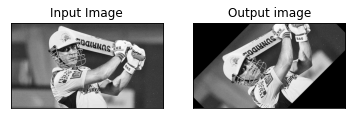

In [ ]:
#Rotation
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Read image from the disk.
img = cv2.imread('/content/dhoni.jpg',0)

# Shape of image in terms of pixels.
(rows, cols) = img.shape[:2]

# getRotationMatrix2D creates a matrix needed for transformation.
#Rotate 45 degree with respect to center
M = cv2.getRotationMatrix2D((cols / 2, rows / 2), 45, 1)
res = cv2.warpAffine(img, M, (cols, rows))

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(res, cmap = 'gray')
plt.title('Output image'), plt.xticks([]), plt.yticks([])

plt.show()

# Lab 4

In [ ]:
# Write a python openCV code to convert the image from the given color model to different  color models.

import cv2
import matplotlib.pyplot as plt
import numpy as np

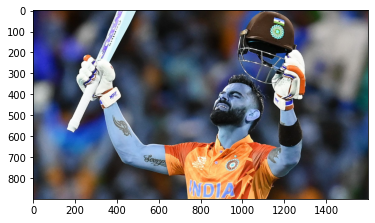

In [ ]:
image = cv2.imread('/content/viratkholi.jpg')
plt.imshow(image)
plt.show()

You’ll notice that it looks like the blue and red channels have been mixed up. In fact, OpenCV by default reads images in BGR format

In [ ]:
h, w, c = image.shape
print("Dimensions of the image is:nnHeight:", h, "pixelsnWidth:", w, "pixelsnNumber of Channels:", c)

Dimensions of the image is:nnHeight: 900 pixelsnWidth: 1600 pixelsnNumber of Channels: 3


it would return 3 values including the height, width, and the number of channels present in the image.

In [ ]:
print(type(image))

<class 'numpy.ndarray'>


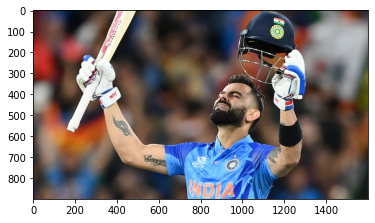

In [ ]:
image = cv2.imread('/content/viratkholi.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # BGR is converted to RGB
plt.imshow(image)
plt.show()

# vistulaizing image in rgb color space

In [ ]:
from mpl_toolkits.mplot3d import Axes3D # An Axes3D object is created just like any other axes using the projection=‘3d’ keyword.
from matplotlib import cm # Container for colormaps that are known to Matplotlib by name.
from matplotlib import colors # A module for converting numbers or color arguments to RGB or RGBA

cv2.split() is used to split coloured/multi-channel image into separate single-channel images. The cv2.split() is an expensive operation in terms of performance(time). The order of the output vector of arrays depends on the order of channels of the input image.

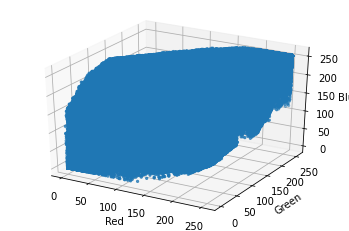

In [ ]:
r, g, b = cv2.split(image) # Using cv2.split() to split channels of coloured image
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

axis.scatter(r.flatten(), g.flatten(), b.flatten(), marker=".")
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
plt.show()

cv2.split() is used to split coloured/multi-channel image into separate single-channel images. The cv2.split() is an expensive operation in terms of performance(time). The order of the output vector of arrays depends on the order of channels of the input image.

#Visualizing image in HSV Color Space

HSV stands for Hue, Saturation, and Value (or brightness), and is a cylindrical color space. The colors, or hues, are modeled as an angular dimension rotating around a central, vertical axis, which represents the value channel. Values go from dark (0 at the bottom) to light at the top. The third axis, saturation, defines the shades of hue from least saturated, at the vertical axis, to most saturated furthest away from the center

In [ ]:
hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

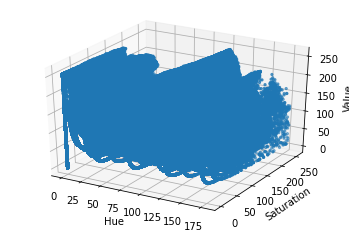

In [ ]:
h, s, v = cv2.split(hsv_image)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

axis.scatter(h.flatten(), s.flatten(), v.flatten(), marker=".")
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()

In HSV space, images blue are much more localized and visually separable. The saturation and value of the blue do vary, but they are mostly located within a small range along the hue axis. This is the key point that can be leveraged for segmentation.

#CMYK color space

Unlike, RGB it is a subtractive color space. The CMYK model works by partially or entirely masking colors on a lighter, usually white, background. The ink reduces the light that would otherwise be reflected. Such a model is called subtractive because inks “subtract” the colors red, green and blue from white light. White light minus red leaves cyan, white light minus green leaves magenta, and white

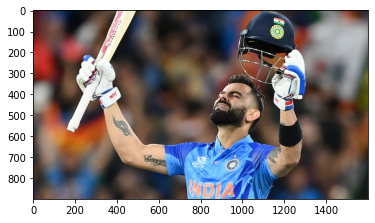

In [ ]:
image = cv2.imread('/content/viratkholi.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

In [ ]:
from PIL import Image

# Open image, convert to CMYK and save as TIF
Image.open('/content/viratkholi.jpg').convert('CMYK').save('result.jpg')

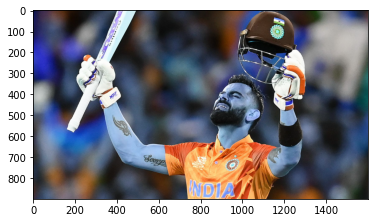

In [ ]:
imagecmyk = cv2.imread('/content/result.tif')
plt.imshow(imagecmyk)
plt.show()

# NOISES IN IMAGES

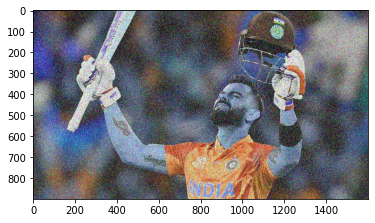

In [ ]:
from skimage.util import random_noise

# Load the image
img = cv2.imread("/content/viratkholi.jpg")

# Add salt-and-pepper noise to the image.
noise_img = random_noise(img, mode='s&p',amount=0.3)

# The above function returns a floating-point image
# on the range [0, 1], thus we changed it to 'uint8'
# and from [0,255]
noise_img = np.array(255*noise_img, dtype = 'uint8')

# Display the noise image
plt.imshow(noise_img)
plt.show()

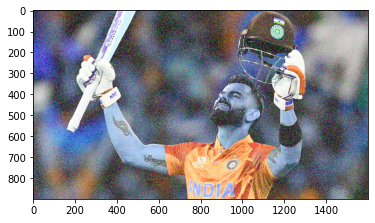

In [ ]:
# gaussian noise

img = cv2.imread('/content/viratkholi.jpg')
# Generate Gaussian noise
gauss = np.random.normal(0,1,img.size)
gauss = gauss.reshape(img.shape[0],img.shape[1],img.shape[2]).astype('uint8')
# Add the Gaussian noise to the image
img_gauss = cv2.add(img,gauss)
# Display the image
plt.imshow(img_gauss)
plt.show()

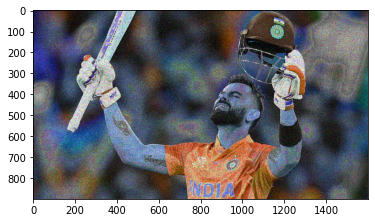

In [ ]:
# Speckle noise

img = cv2.imread('/content/viratkholi.jpg')

gauss = np.random.normal(0,1,img.size)
gauss = gauss.reshape(img.shape[0],img.shape[1],img.shape[2]).astype('uint8')
noise = img + img * gauss

plt.imshow(noise)
plt.show()

# Apply linear and non-linear filters

cv2.filter2D() is used to perform convolution operation with 2D image and the kernel(N x M dimensional matrix) is used

In [ ]:
def compare_image(image1, image2):
  plt.figure(figsize=(9,9))
  plt.subplot(1,2,1)
  plt.imshow(image1)
  plt.title('Orignal')
  plt.axis('off')

  plt.subplot(1,2,2)
  plt.imshow(image2)
  plt.title('Modified')
  plt.axis('off')

  plt.tight_layout()

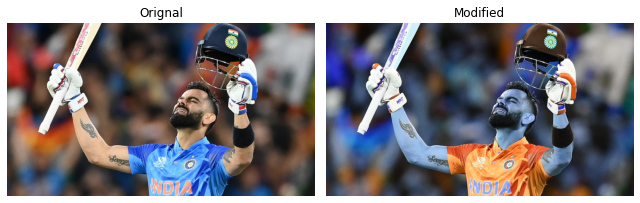

In [ ]:
img = cv2.imread('/content/viratkholi.jpg')
img2 = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
compare_image(img2,img)

2d conculation

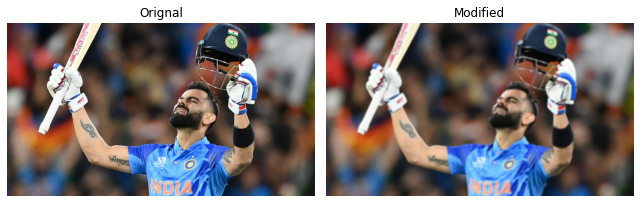

In [ ]:
kernel = np.ones((10,10),np.float32)/100
cnv = cv2.filter2D(img2, -1, kernel)
compare_image(img2,cnv)

Image Smoothing:
Image smoothing is achieved by convolving the image with different filters. It is useful for removing the high-frequency content such as noise and edges from the image, resulting in blurred edges when these filters are applied

Averaging
The averaging is done by simply convolving the image with a normalized box filter. It takes the average of all pixels under the kernel window and replaces the central element with this average

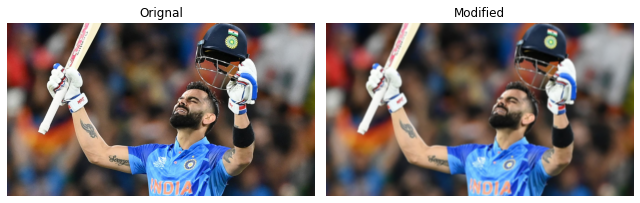

In [ ]:
## Average Filtering
blur = cv2.blur(img2,(10,10))
compare_image(img2,blur) 

Median Filtering:
cv2.medianBlur() computes the median of all the pixels under the kernel window and replaces the central value with the median value. This filter is highly used to remove noise from the image. 

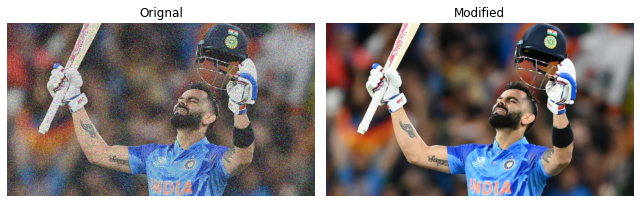

In [ ]:
from skimage.util import random_noise
## adding noise
noise_img = random_noise(img2, mode='s&p',amount=0.3)
noise_img = np.array(255*noise_img, dtype = 'uint8')
## median filter
median = cv2.medianBlur(noise_img,5)
compare_image(noise_img,median)

Bilateral Filtering:
The previous filters blur the image, but the bilateral filter tends to blur the image preserving the edges between the objects. In addition, while blurring the image, the bilateral filter considers the nearby pixel intensity values and considers whether the pixel is on edge or not; this makes the operation of this filter a bit slow

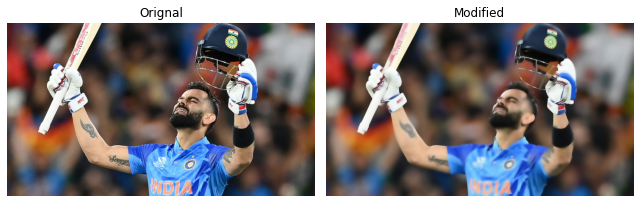

In [ ]:
# bilateral filtering
img = cv2.imread('/content/viratkholi.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
blur = cv2.bilateralFilter(img,20,200,300)
compare_image(img,blur)

#Morphological Filters:
Morphological filters are some simple operations based on image shape. These filters need two inputs: image and kernel, which decides the nature of the operation.

Erosion:
It is just like soil erosion; it erodes the boundary, it warns away the boundaries of foreground objects, i.e., tries to keep the foreground white. So the operation follows as the kernel slides over the image, and a pixel of the image is considered one only if all the pixels under the kernel are 1; otherwise, it is eroded

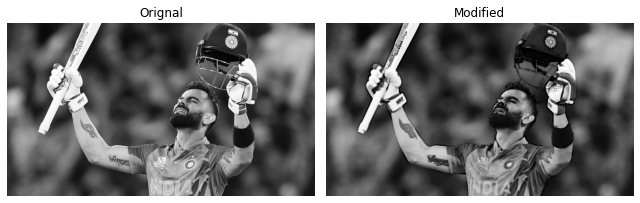

In [ ]:
# erosion
img = cv2.imread('/content/viratkholi.jpg',0)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(img,kernel,iterations=1)
compare_image(img,erosion)

Dilation:
It is just the opposite of erosion; here, the pixel is considered as one if at least one pixel under the kernel is one, so in this case, it increases the white region in the image. Dilation is also helpful in joining the broken part of an object

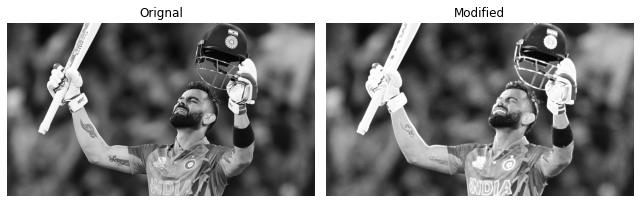

In [ ]:
# Dilation
dia = cv2.dilate(img,kernel,iterations=1)
compare_image(img,dia)

* Morphological Gradient:
It is the difference between the dilation and erosion, and the result looks like the object’s outline.

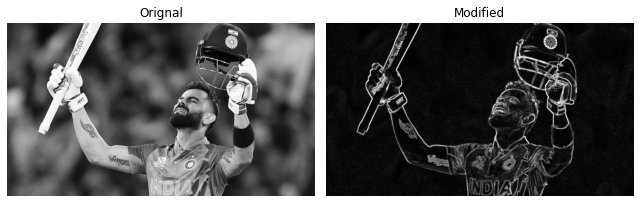

In [ ]:
# gradient
grad = cv2.morphologyEx(img,cv2.MORPH_GRADIENT, kernel)
compare_image(img,grad)